# Module 13 - Logistic Regression 
---

## Learning outcomes

- LO 1: Distinguish logistic regression from linear regression in terms of its categorical output and its best use cases for binary classification.
- LO 2: Describe how adjustments to parameters impact the shape of logistic functions.
- LO 3: Determine the optimal number of statistically relevant predictors to add to a logistic regression function.
- LO 4: Apply a maximum likelihood method to fit a logistic regression to a real-life data set.
- LO 5: Compare the advantages and disadvantages of applying logistic regression relative to other classification methods.
- LO 6: Identify a codebase for machine learning competitions.

## Misc and Keywords
- **Quasi-separation** (or "near-perfect separation") is a situation that occurs in logistic regression when a predictor variable almost completely separates the outcome variable. It means that for almost all values of an independent variable, the dependent variable is either always 0 or always 1, but not entirely.
- **A two-sided (two-tailed) p-value** tests for any significant deviation in either direction (positive or negative). It answers the question: "Is the coefficient significantly different from zero in either the positive or negative direction?"
- **The Z-statistic (Z-score)** in logistic regression is used to test whether a particular coefficient is significantly different from zero. It measures how many standard errors a coefficient is away from zero.

---

## Introduction
Logistic Regression is a classification method that extends linear regression to handle a categorical response variable. It is a generalised linear model used to predict the probability of an observation belonging to a particular category.

A categorical response variable means the outcome falls into distinct categories, typically binary (e.g., yes/no, spam/not spam). Logistic regression models the probability of an observation belonging to one of these categories using the sigmoid (logistic) function, which ensures the output is between 0 and 1.

Since logistic regression is a parametric model, it requires parameters (coefficients) that need to be estimated and tuned. These parameters are learned using Maximum Likelihood Estimation (MLE) rather than minimising squared errors, as in linear regression.

The input consists of one or more continuous numerical features, and the output is a binary categorical variable. Logistic regression assumes a linear relationship between the input features and the log-odds of the categorical outcome.

## So...

Assume we have a set of predictors $x \in \mathcal{X}$, and a set of outputs $y \in \{0, 1 \}$. We are then interested in estimating the probability of belonging to a certain class, that is, we want to build an estimator, $\hat{p}(x)$, such that:
$$
\hat{p}(x) = \mathbb{P}( Y = 1 | X = x )
$$

There are many real-world scenarios where this might be the case. Consider for example, we might be interested in predicting if a particular individual infected with COVID will need hospital treatment. In this case, we would define $Y = 1$ the scenario where the individual requires treatment, and $Y = 0$ otherwise. For predictors we could use $X = $ age. 

We could decide to use linear regression, that is, a model of the form:
$$
\hat{p}(x) = \beta_0 + x \beta_1
$$

However, we run into trouble. Probabilities must lie between 0 and 1! The linear model is unable to incorporate this property into its predictions!

We can instead wrap our linear model in a function that guarantees all our outputs lie between 0 and 1. We will be using the sigmoid function, defined as:
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

After wrapping the linear model, we obtain the logistic regression model, given by:
$$
\hat{p}(x) = \sigma(\beta_0 + x \beta_1)
$$

Which we can write as:
$$
\hat{p}(x) = \frac{e^{\beta_0 + x \beta_1}}{1 + e^{\beta_0 + x \beta_1}}
$$

---

## Linear Vs. Logistic Regression

Linear Regression is a supervised learning algorithm used for predicting continuous values. It assumes a linear relationship between the input features meaning it models data with the equation $Y = \beta_0 + \beta_1 X + \epsilon$ , where $\beta_0$ is the intercept, $\beta_1$ is the slope and $\epsilon$ is the noise

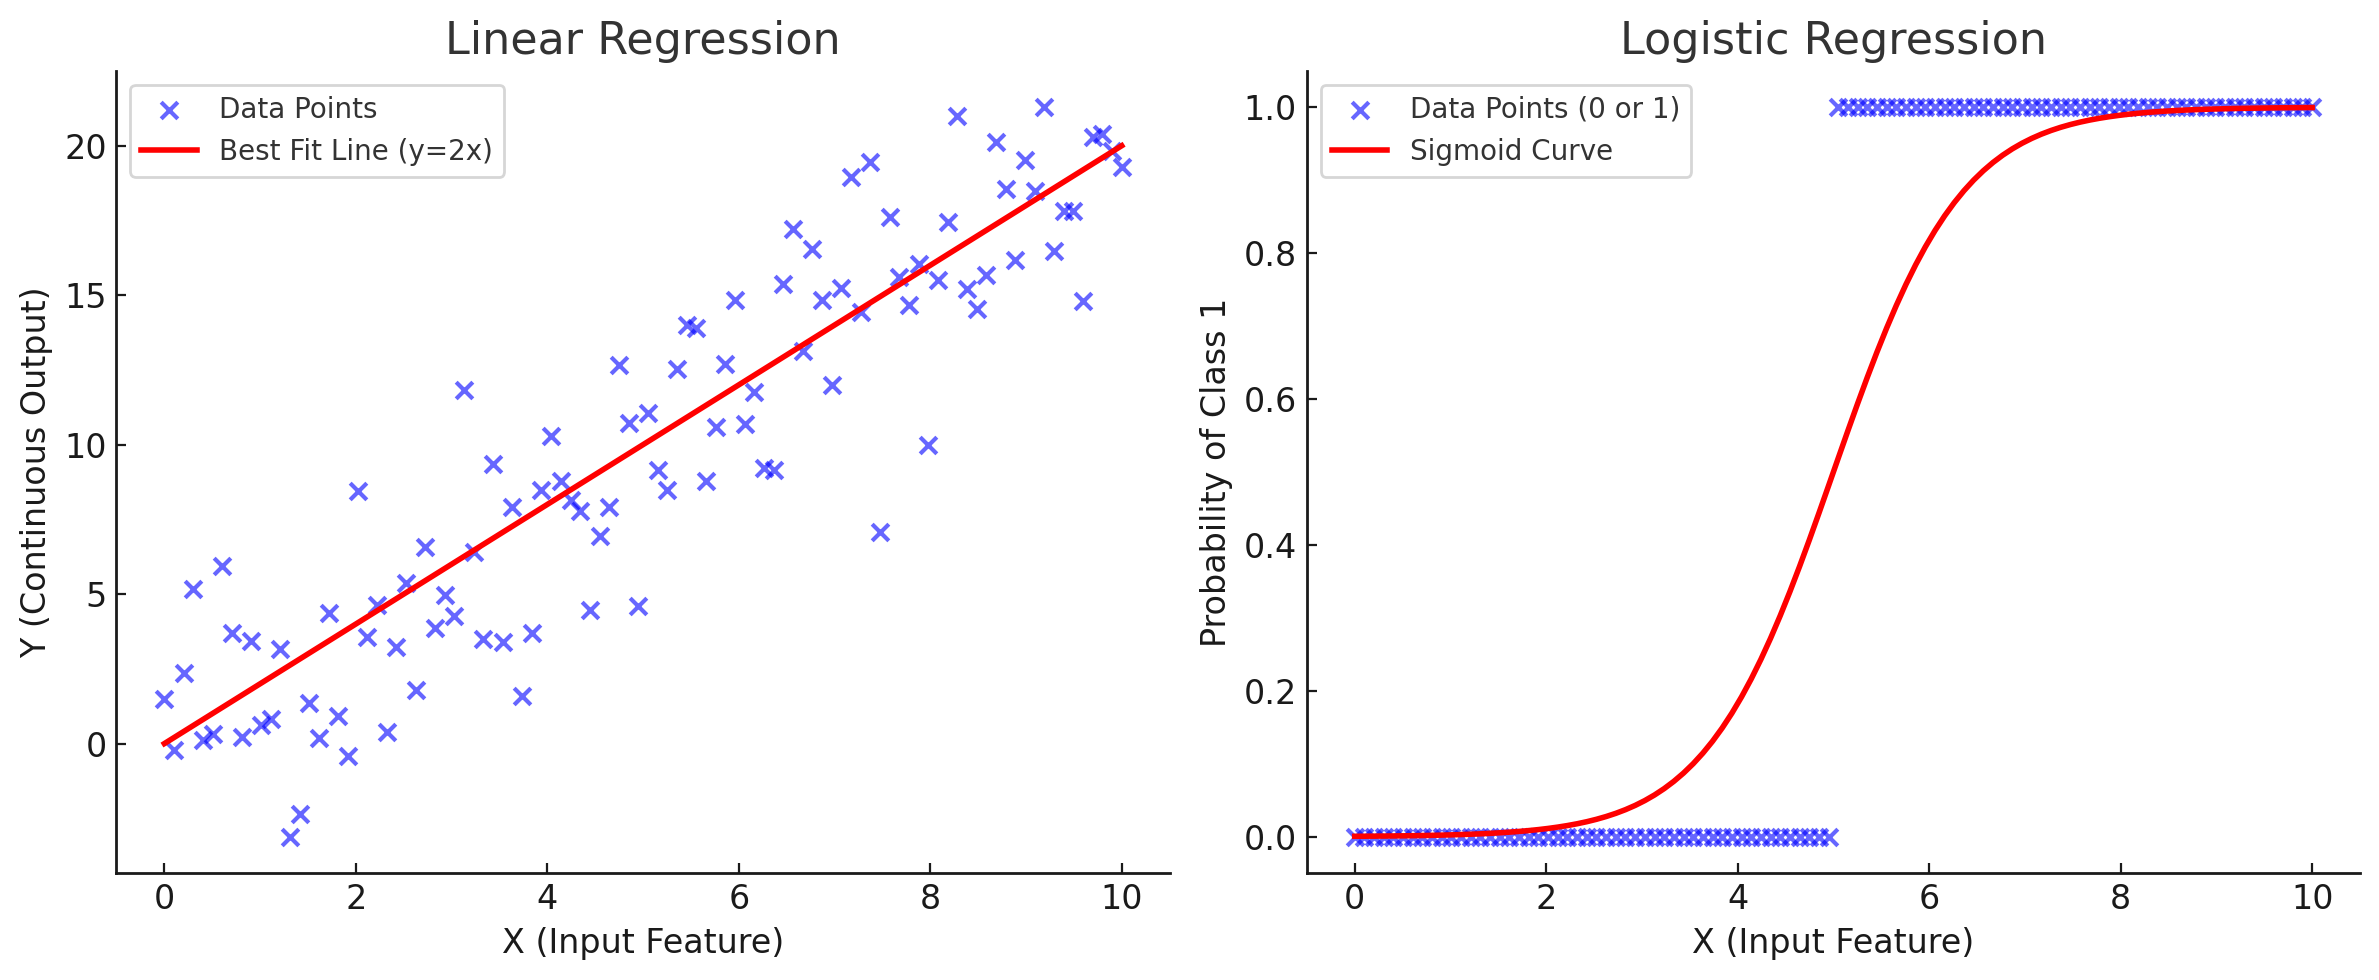

| Linear Regression        | Logistic Regression       |
|--------------------------|--------------------------|
| Uses continuous inputs. | Uses continuous inputs. |
| Generalised linear model. | Generalised linear model. |
| Response data is real numbers. i.e. height, price, and yield. | Response data is binary {0, 1}. i.e. yes/no, and positive/negative. |
| Models the response variable directly. | Models the probability of each response. |
| Can output any real number. | Outputs always lie in [0, 1]. |
| Usually fitted using linear algebra. | Trained using MLE with gradient methods. |
| Linear with respect to the output. | Linear with respect to the log-odds. |

In logistic regression, a steeper curver signifies greater certainty of either 0 or 1

---

## Logistic Regression Formula

In logistic regression, the model predicts the probability that a given input belongs to the positive class (class 1). The probability is modeled using the **logistic function (sigmoid function)**.

The general form of the logistic regression model is:

$$
P(y = 1 | \mathbf{X}) = \sigma(\mathbf{w}^T \mathbf{X} + b)
$$

where:

- $P(y = 1 | \mathbf{X})$ is the probability that the output $y$ belongs to class 1, given the input features $\mathbf{X}$.
- $\sigma(z) = \frac{1}{1 + e^{-z}}$ is the **sigmoid function** that transforms the linear output into a probability between 0 and 1.
- $\mathbf{w}$ is the vector of **weights** (coefficients) corresponding to the input features $\mathbf{X}$.
- $\mathbf{X}$ is the vector of input features.
- $b$ is the **bias** term, which allows the model to make predictions even when all the features are zero.

## The Parameters of Logistic Regression:

The parameters in logistic regression are:

- **$\beta_0$ (intercept or bias)**: This is a constant term that allows the model to fit the data even when all the input features are zero. It shifts the decision boundary.  
- **$\beta_1, \beta_2, ..., \beta_n$ (coefficients or weights)**: These are the weights associated with each feature. They represent the influence of each feature on the predicted probability. The model learns these values during training to minimise the error.

The logistic regression model can be rewritten as:

$$
\mathbf{w}^T \mathbf{X} + b = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n
$$

Where:
- **$\beta_0$** is the **intercept** (also called **bias**).
- **$\beta_1, \beta_2, ..., \beta_n$** are the **weights** for each input feature **$X_1, X_2, ..., X_n$**.

The model is trained by optimising the weights and bias to minimise the **log-loss (cross-entropy loss)**, which measures the difference between the predicted probabilities and the actual labels.

### Logistic Regression Model Parameters:

- **Weights ($\mathbf{w}$)**: These are the coefficients that represent the influence of each feature on the predicted probability. The model learns these values during training to minimise the error.
- **Bias ($b$)**: This is a constant added to the linear combination of inputs. It helps the model make predictions even when the feature values are zero.
- **Input Features ($\mathbf{X}$)**: These are the independent variables (data) used to predict the dependent variable $y$ (the output).

The model is trained by optimising the weights and bias to minimise the **log-loss (cross-entropy loss)**, which measures the difference between the predicted probabilities and the actual labels.



## Statistical Properties of Logistic Regression

It can have as many inputs as desired, but should not be over complicated with unnecessary inputs. You can use the z-score to assist in [Determining Variables for Logistic Regression](#Determining-Variables-for-Logistic-Regression)

The outputs are typically binary 

Logistic regression is a generalised linear model.  There is a linear function hidden inside the logistic model. 

For a single input the parameters are $\beta_0$ and $\beta_1$  which correspond to the intercept and slope. For multiple inputs the number of parameters increases. Parameters are often selected using maximum-likelihood



---

## Determining Variables for Logistic Regression

Not all of the variables available will be predictive of the output. It is useful to test whether a given variable is a significant predictor. One way to do this is by using **Z-scores**.

We can use the code below to obtain statistics of some given features X and outputs y.

model = sm.Logit(y,X).fit()
model.summary()

To obtain the table shown below, an example of a logistic regression output showing coefficients, Z-scores, and p-values:

| Variable | Coefficient $ \beta $ | Standard Error $SE(\beta) $ | Z-score | p-value  | Significance? |
|----------|----------------|----------------|---------|---------|--------------|
| Intercept $\beta_0$ | 1.2  | 0.48  | 2.5  | 0.012  | ✅ Significant |
| $X_1$  | 0.8  | 0.26  | 3.1  | 0.002  | ✅ Significant |
| $X_2$  | -0.4 | 0.36  | -1.1  | 0.27   | ❌ Not Significant |

From this table, $ X_1 $ is a significant predictor, while $ X_2 $ is not and could be considered for removal.

By examining **Z-scores and p-values**, we can identify which variables significantly contribute to the logistic regression model and remove those that do not.

- **Logistic regression** estimates coefficients that describe the relationship between input variables and the log odds of the outcome.
- **Significant coefficients** are those with a p-value < 0.05, indicating that the predictor has a meaningful effect on the outcome.
- **Confidence intervals** help assess the precision of coefficient estimates. If the CI does not contain zero, the predictor is likely significant.

#### Coefficients
- A **positive coefficient** means that as the value of the predictor increases, the log odds of the outcome occurring increase (the outcome becomes more likely).  
- A **negative coefficient** means that as the value of the predictor increases, the log odds of the outcome occurring decrease (the outcome becomes less likely).

**Example:**  
For **Pregnancies**, the coefficient is $0.1284$, meaning for each additional pregnancy, the log odds of the outcome (e.g., diabetes) increase by $0.1284$.

#### Standard Error
The standard error of the coefficient is a measure of the variability or uncertainty of the estimated coefficient. It quantifies the precision of the coefficient estimate.
- **Interpretation:**  
  - **Smaller standard errors** indicate more precise estimates of the coefficient.  
  - **Larger standard errors** suggest more uncertainty in the estimate.

#### Z-Score
In logistic regression, the **Z-score** for a coefficient $ \beta $ is calculated as:

$$
Z = \frac{\hat{\beta}}{\text{SE}(\hat{\beta})}
$$

where:
- $ \hat{\beta} $ is the estimated coefficient.
- $ \text{SE}(\hat{\beta}) $ is the standard error of the coefficient.

A **higher absolute Z-score** indicates stronger evidence that the variable is important.

The Z-score tests whether the coefficient is significantly different from zero (null hypothesis: coefficient = 0).
- **A large positive Z-score** → The variable has a **strong positive effect** on the outcome.  
- **A large negative Z-score** → The variable has a **strong negative effect** on the outcome.  
- **A small Z-score (close to 0)** → The variable has **little or no significant effect**.

#### **Two-Sided p-Values**
To determine significance, we calculate the **two-sided p-value**:

$$
p = 2 \times P(Z > |Z_{\text{obs}}|)
$$

- The common threshold for significance is $p < 0.05$, meaning if the p-value is below this threshold, the coefficient is statistically significant.
- If the p-value is greater than $0.05$, the coefficient is considered **not significant**.

#### Confidence

If the confidence interval contains zero, it suggests that the predictor might not significantly affect the outcome (as zero is a possible value for the true coefficient). 

If the confidence interval does not contain zero, it suggests that the predictor is likely to have a significant effect on the outcome.


## Estimating Parameters
The parameters of a linear regression model can be estimated using least squares. However, it is not the best optimiser for logistic regression. This is because we are not estimating $Y$ directly, instead we are estimating $\textit{the probability}$ of Y. This means maximum likelihood estimation is much more appropriate for logistic regression. We can write the likelihood function easily:

$$
\mathcal{L} = \prod_{i : y_i = 1} \mathbb{P}(Y = 1 | X = x_i) \prod_{i' : y_{i'} = 0} (1 - \mathbb{P}(Y = 0 | X = x_{i'}))
$$

Instead of maximising this directly, it is more common to minimise the negative log-likelihood:
$$
\ell(\beta) = - \log \mathcal{L}(\beta) = - \sum_{i : y_i = 1} \log\sigma(x_i^T \beta) - \sum_{i' : y_{i'} = 0}\log \sigma(x_{i'}^T\beta)
$$
So that we choose our parameters, $\hat{\beta}$:
$$
\hat{\beta} = \arg\min_{\beta} \ell(\beta)
$$

Finding the minimum can easily be done using any gradient-based optimiser. In addition, we can also add regularisation, which helps us avoid overfitting. We will begin by investigating this.

---

## Quasi-Separation

Quasi-separation (or "near-perfect separation") is a situation that occurs in logistic regression when a predictor variable almost completely separates the outcome variable. It means that for almost all values of an independent variable, the dependent variable is either always 0 or always 1, but not entirely.

### Why is Quasi-Separation a Problem?

It can cause very large (or infinite) coefficients, making the model unreliable.

The logistic regression model struggles to converge because MLE cannot find a finite solution.

### Solutions to Quasi-Separation

Regularisation – Using L1 (Lasso) or L2 (Ridge) regularisation can shrink extreme coefficients.

Remove or transform the problematic variable – If a feature is causing separation, you may:

- Bin the variable into categories.
- Merge categories to reduce separation.
- Drop the feature if it’s not meaningful.
  
Use Bayesian or Penalised Regression – Models like Firth logistic regression can handle separation better.

---

## Log Odds in Logistic Regression  

In logistic regression, the model predicts the **probability** of an event occurring. Instead of modeling probabilities directly, logistic regression works with **log odds**, which help transform probabilities into a form that fits a linear equation.  

### **Definition of Log Odds**  
The **odds** of an event occurring are defined as:  

$$
\text{Odds} = \frac{P(Y=1)}{1 - P(Y=1)}
$$

where:
- $P(Y=1)$ is the probability that the outcome is **1** (e.g., success, positive class).  
- $1 - P(Y=1)$ is the probability that the outcome is **0** (failure, negative class).  

The **log odds (logit transformation)** is simply the natural logarithm of the odds:

$$
\text{Log Odds} = \log \left( \frac{P(Y=1)}{1 - P(Y=1)} \right)
$$

### **Why Use Log Odds?**
1. **Transforms probabilities (0 to 1) into an unbounded scale (-∞ to +∞)**  
   - Probabilities range from **0 to 1**, but a linear model requires a response that can take any value from **-∞ to +∞**.  
   - Taking the logarithm of odds achieves this transformation.  

2. **Allows Logistic Regression to Fit a Linear Model**  
   - Logistic regression models **log odds** as a linear function of the input variables:  

$$
\log \left( \frac{P(Y=1)}{1 - P(Y=1)} \right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n
$$

   - This makes it possible to estimate coefficients ($\beta$) using **maximum likelihood estimation (MLE)**.



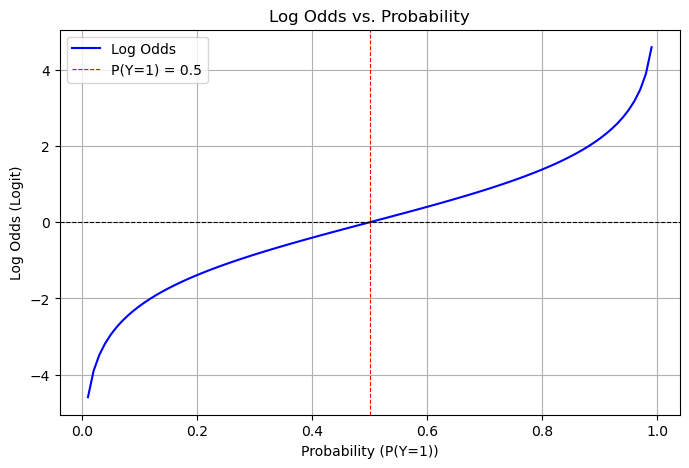

In [3]:
### **Visualisation of Log Odds vs. Probability**

import numpy as np
import matplotlib.pyplot as plt

# Generate probability values between 0 and 1
p = np.linspace(0.01, 0.99, 100)
log_odds = np.log(p / (1 - p))

# Plot log odds vs. probability
plt.figure(figsize=(8,5))
plt.plot(p, log_odds, label="Log Odds", color='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(0.5, color='red', linestyle='--', linewidth=0.8, label="P(Y=1) = 0.5")

plt.xlabel("Probability (P(Y=1))")
plt.ylabel("Log Odds (Logit)")
plt.title("Log Odds vs. Probability")
plt.legend()
plt.grid()
plt.show()

---

## Logistic Regression: Advantages and Disadvantages

### Advantages of Logistic Regression

1. **Relatively Simple and Interpretable**:
   Logistic regression is a straightforward and interpretable model. It provides a clear understanding of how the features contribute to the prediction. The model coefficients indicate the direction and strength of the relationship between the independent variables and the dependent variable.

2. **Generalised Linear Model (GLM)**:
   Logistic regression is a type of generalised linear model that models the probability of a binary outcome. It uses the logistic function to map any input to a range between 0 and 1, making it suitable for binary classification problems.

3. **Can Test Whether Input Features Are Relevant**:
   By examining the coefficients and their corresponding standard errors, we can assess the significance of individual features. Features with non-zero coefficients have a meaningful impact on the model's prediction. Statistical tests, such as the Wald test, can help identify whether a feature is relevant.

4. **Model Evaluation via Accuracy of Coefficients**:
   The accuracy of coefficients in logistic regression can be assessed using standard errors and confidence intervals. This allows us to gauge the precision of the estimated coefficients and determine how reliable the model’s predictions are.

### Logistic Regression vs. Neural Networks (NN)

#### Neural Networks

- **Non-Parametric**:
  Neural networks are non-parametric models, meaning they do not make strong assumptions about the form of the underlying data distribution. This flexibility allows them to model more complex relationships between inputs and outputs.

- **Maximum Likelihood Setup**:
  Logistic regression requires the assumption of maximum likelihood estimation, whereas neural networks typically use gradient-based optimisation (e.g., backpropagation and stochastic gradient descent) to minimise a loss function. This gives neural networks the ability to handle highly non-linear data better than logistic regression.

- **Output Type**:
  Logistic regression provides probabilities as output (i.e., a value between 0 and 1), while neural networks typically output a hard decision boundary (e.g., a classification label). Logistic regression is useful when we need to understand the certainty of a prediction, whereas neural networks are more effective in situations where a discrete output is needed.


### Logistic Regression vs. Decision Trees (DT)

#### Decision Trees

- **Handling Collinearity**:
  Decision Trees can handle collinearity (high correlation between features) better than logistic regression. This is because decision trees do not rely on assumptions about the linearity or independence of the features.

- **Interpretability**:
  Decision Trees tend to be easier to interpret in terms of decision paths, as they visually split data based on feature thresholds. However, logistic regression provides more precise quantification of the relationships between features and the outcome, which can be important for understanding the strength and direction of feature impacts.

- **Model Complexity**:
  While decision trees can capture non-linear relationships well, they are prone to overfitting, especially when trees are deep. Logistic regression, by contrast, offers a simpler model and tends to generalise better when the relationships between features and the outcome are linear.


### Logistic Regression vs. Naive Bayes (NB)

### Naive Bayes

- **Generative vs. Discriminative**:
  - **Naive Bayes** is a *generative* model, meaning it models how the data is generated. It assumes the features are conditionally independent given the class label and computes the probability of a data point belonging to each class based on Bayes' Theorem.
  - **Logistic Regression** is a *discriminative* model, meaning it directly models the probability of the class given the input features. Logistic regression focuses on the boundary between classes, whereas Naive Bayes focuses on modeling the distribution of features.

- **Collinearity**:
  Logistic regression handles feature interactions and collinearity better than Naive Bayes, which assumes that features are independent given the class. In situations where features are highly correlated, logistic regression's ability to incorporate interactions may lead to better performance.

- **Assumptions**:
  Naive Bayes assumes conditional independence between features, which is often unrealistic in real-world data. Logistic regression, on the other hand, does not assume independence, making it a more robust choice when feature correlations exist.

- **Performance with Small Data**:
  Naive Bayes tends to perform well with small datasets, as it requires fewer parameters to estimate. Logistic regression, while more flexible, may require more data to accurately estimate the coefficients if there are many features.

---

### Conclusion

In summary, logistic regression is a simple, interpretable, and effective model for binary classification tasks. It is particularly useful when you need to understand the contribution of individual features and when the relationship between features and the outcome is linear. However, when dealing with highly non-linear data or complex relationships, neural networks may offer superior performance due to their flexibility. Decision Trees handle feature collinearity well, but they are prone to overfitting. Naive Bayes is often useful for small datasets but is limited by the assumption of feature independence.

Choosing between these models depends on the data at hand, the interpretability required, and the computational resources available.

